# Movie sentiment analysis

**Data:**

The data source is Movie Sentiment project from Kaggle, including train and test datasets; In trainning data, there is Phrase column and Sentiment column as the result score from 0 to 4 (negative to positve); In test data, there is Phrase column for us to analyze the sentiment of each phrase.

**Goal:**


Perform NLP analysis on trainning data and use different Machine learning models to compare model performances, and predict Phrase sentiment on test data. 

**Highlight:** 

- Show NLP process step by step
- Stremline NLP process with ML Pipeline
- Using Object_oriented programming build class to perfrom mutiple ML models efficiently

**NLP process steps:**

- Remove punctuation
- Tokenize sentence
- Remove stopwords
- Stem or lemmatize words:
  - Both methods aim to change the words to original form (if using both: better lemmartize first and then stem)
     - Stemming change words based on rules on string: e.g.: delted 's' at the end of noun. While it has serious limitations on change the actual meaning of words. Since the algorithm is change based on rules for strings, it runs faster and it's a good choice if time is a concern in NLP process
          - There are three stemmer: porter, snowball(porter2), lancaster; porter is the orginal and most gental one, while it's the most computationally intensive. snowball is a litter intensive than porter and it improves from porter (common option); lancaster is the most aggresive one, the faster one while the final words might obscure
     - Lemmatization change words based on the dictionary from different algorithms, such as "went" to "go". Based on the differnt type of the word (verb, noun), it can change to differnt meaning of word which solve the disambiguation problem. While it demands more computaional power. (It can be used if you want to build a dictionary world: NLP system)
- Calculate TFIDF 
- Train ML models
- Compare models results and test model



**Reference:**


NLP process: 
https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1

TFIDF:
https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089

Hyperparameter on machine learning models:  https://github.com/davidsbatista/machine-learning-notebooks/blob/master/hyperparameter-across-models.ipynb

**Summary:**
- Change list to Series: pd.Series(list)
- Apply str method to column: DF.column.str.apply()
- Classification_report: macro average: simply get the mean of score. weighted average: consider the portion of each class


# Build ML models step by step
## Step1:  Exploring Data Analysis

In [1]:
## Import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Read data
train=pd.read_csv('/Users/admin/Documents/learning1/sentiment_analysis/Movie/sentiment-analysis-on-movie-reviews/train.csv')
test=pd.read_csv('/Users/admin/Documents/learning1/sentiment_analysis/Movie/sentiment-analysis-on-movie-reviews/test.csv')

In [3]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


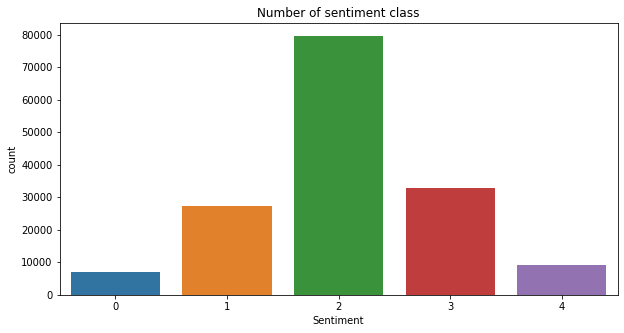

In [5]:
## Show the number of class distributed
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Number of sentiment class')
sns.countplot(x=train.Sentiment,data=train)

## Step2: NLP process (step by step)
### Remove punctuation and lowercase

In [6]:
train.Phrase[:10]

0    A series of escapades demonstrating the adage ...
1    A series of escapades demonstrating the adage ...
2                                             A series
3                                                    A
4                                               series
5    of escapades demonstrating the adage that what...
6                                                   of
7    escapades demonstrating the adage that what is...
8                                            escapades
9    demonstrating the adage that what is good for ...
Name: Phrase, dtype: object

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
train.Phrase=train.Phrase.apply(lambda x: x.translate(str.maketrans('','',string.punctuation)).lower())

In [9]:
train.Phrase[:10]

0    a series of escapades demonstrating the adage ...
1    a series of escapades demonstrating the adage ...
2                                             a series
3                                                    a
4                                               series
5    of escapades demonstrating the adage that what...
6                                                   of
7    escapades demonstrating the adage that what is...
8                                            escapades
9    demonstrating the adage that what is good for ...
Name: Phrase, dtype: object

### Tokenize sentence

In [10]:
train.Phrase=train.Phrase.str.split(' ')

In [11]:
train.Phrase[:10]

0    [a, series, of, escapades, demonstrating, the,...
1    [a, series, of, escapades, demonstrating, the,...
2                                          [a, series]
3                                                  [a]
4                                             [series]
5    [of, escapades, demonstrating, the, adage, tha...
6                                                 [of]
7    [escapades, demonstrating, the, adage, that, w...
8                                          [escapades]
9    [demonstrating, the, adage, that, what, is, go...
Name: Phrase, dtype: object

### Remove stopwords

In [12]:
from nltk.corpus import stopwords
stopwords_e=stopwords.words('english')

In [13]:
stopwords_e=stopwords.words('english')

In [14]:
train.Phrase=[w for w in train.Phrase if w not in stopwords_e]
train.Phrase.head()

0    [a, series, of, escapades, demonstrating, the,...
1    [a, series, of, escapades, demonstrating, the,...
2                                          [a, series]
3                                                  [a]
4                                             [series]
Name: Phrase, dtype: object

### Lemmatize words

In [15]:
import nltk
##nltk.download()

In [16]:
from nltk.stem import WordNetLemmatizer
lemmar=WordNetLemmatizer()

In [ ]:
train.Phrase=train.Phrase.apply(lambda x: [lemmar.lemmatize(w) for w in x])

### Stemming words

In [18]:
## Method1:
from nltk.stem import PorterStemmer
porter=PorterStemmer()

In [19]:
train.Phrase=train.Phrase.apply(lambda x: [porter.stem(w) for w in x])

In [20]:
## Method2:
from nltk.stem import SnowballStemmer
snow=SnowballStemmer('english')

In [21]:
train.Phrase=train.Phrase.apply(lambda x: [snow.stem(w) for w in x])

### TFIDF vectorize

TFIDF: Term frequency inverse document frequency


**formula:** 
TFIDF=Term frequency* Inverse Document frequency



- Term frequency: count of same word w in a documents/ the total number of words in documents

- Document frequency: number of documents have the word/the total number of documents

- To avoid the number of documents too big, we take log of the IDF: if word not shows up, log(IDF)=0, and 0 cannot be divide, we add 1, so formula becomes: TF*log(N/DF+1) [More info in references]


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
vector=TfidfVectorizer(stop_words='english')

In [23]:
train.Phrase=train.Phrase.apply(lambda x: ' '.join(x))

In [24]:
vector1=vector.fit(train.Phrase)

In [25]:
train_feature=vector1.transform(train.Phrase)

In [26]:
train_feature.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Step3: Build ML models on train dataset

### Multi_class logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
lr=LogisticRegression(multi_class='ovr')

In [28]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,a seri of escapad demonstr the adag that what ...,1
1,2,1,a seri of escapad demonstr the adag that what ...,2
2,3,1,a seri,2
3,4,1,a,2
4,5,1,seri,2


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [30]:
lr=lr.fit(train_feature,train.Sentiment)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
## Coefficient
lr.coef_

array([[ 1.21114677,  0.17824815,  0.50923799, ..., -0.14844468,
        -0.12491678,  3.19778614],
       [ 0.83928139, -0.12004983, -0.53486703, ..., -0.38794834,
        -0.4299312 , -0.38965957],
       [-0.69299153, -0.00390067, -0.50503235, ...,  0.63273319,
         0.60060472, -1.87608001],
       [-0.79017577,  0.35190065,  1.05565261, ..., -0.21987277,
        -0.3267431 , -0.28377234],
       [-0.37148987,  0.58561169, -0.12382795, ..., -0.14387475,
         0.15856984, -0.03803367]])

In [32]:
## Get the model performance on train dataset since we don't have test response data
train_predict=lr.predict(train_feature)

In [33]:
## the number of data in each class
train.Sentiment.value_counts().sort_index()

0     7072
1    27273
2    79582
3    32927
4     9206
Name: Sentiment, dtype: int64

In [34]:
## number of data in predict result
np.unique(train_predict,return_counts=True)

(array([0, 1, 2, 3, 4]), array([  2140,  18310, 105697,  26640,   3273]))

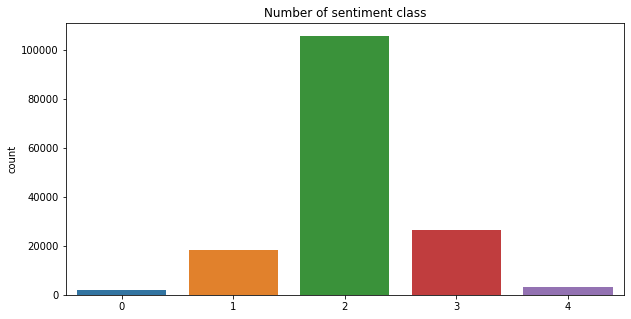

In [37]:
## Plot predict result
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Number of sentiment class')
sns.countplot(train_predict)

In [36]:
print(classification_report(train_predict, train.Sentiment))

              precision    recall  f1-score   support

           0       0.20      0.67      0.31      2140
           1       0.40      0.59      0.47     18310
           2       0.90      0.68      0.77    105697
           3       0.48      0.59      0.53     26640
           4       0.25      0.69      0.36      3273

    accuracy                           0.65    156060
   macro avg       0.44      0.64      0.49    156060
weighted avg       0.75      0.65      0.68    156060



### Muti-class SVM

In [38]:
from sklearn import svm

In [39]:
svm1=svm.SVC(decision_function_shape='ovo')

In [40]:
svm1.fit(train_feature, train.Sentiment)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [41]:
svm_train_pred=svm1.predict(train_feature)

In [93]:
## Number of predict class
np.unique(svm_train_pred,return_counts=True)

(array([2]), array([156060]))

In [ ]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Number of sentiment class')
sns.countplot(svm_train_pred)

In [53]:
print(classification_report(svm_train_pred, train.Sentiment))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       1.00      0.51      0.68    156060
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.51    156060
   macro avg       0.20      0.10      0.14    156060
weighted avg       1.00      0.51      0.68    156060



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Decision tree model

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
ds=DecisionTreeClassifier()
ds.fit(train_feature, train.Sentiment)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
print(ds.feature_importances_)

[3.06598786e-05 5.52391934e-05 2.31023687e-05 ... 6.05794973e-05
 1.45835236e-07 9.13276080e-05]


In [77]:
ds_train_pred=ds.predict(train_feature)

In [92]:
train.Sentiment.value_counts().sort_index()

0     7072
1    27273
2    79582
3    32927
4     9206
Name: Sentiment, dtype: int64

In [80]:
## Number of predict class
np.unique(ds_train_pred,return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 8806, 29536, 82672, 28807,  6239]))

In [ ]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Number of sentiment class')
sns.countplot(ds_train_pred)

In [78]:
print(classification_report(ds_train_pred, train.Sentiment))

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      8806
           1       0.83      0.77      0.80     29536
           2       0.90      0.87      0.89     82672
           3       0.73      0.84      0.78     28807
           4       0.62      0.91      0.74      6239

    accuracy                           0.84    156060
   macro avg       0.79      0.82      0.80    156060
weighted avg       0.85      0.84      0.84    156060



### Random forest model

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf=RandomForestClassifier()
rf.fit(train_feature, train.Sentiment)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
print(rf.feature_importances_)

[1.37165709e-04 4.61762008e-05 4.90647031e-05 ... 3.93968965e-06
 1.98839338e-06 8.34139058e-05]


In [103]:
rf_train_pred=rf.predict(train_feature)

In [ ]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Number of sentiment class')
sns.countplot(rf_train_predict)

In [104]:
print(classification_report(rf_train_pred, train.Sentiment))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      6638
           1       0.77      0.79      0.78     26476
           2       0.90      0.86      0.88     83305
           3       0.76      0.80      0.78     31413
           4       0.72      0.80      0.76      8228

    accuracy                           0.83    156060
   macro avg       0.78      0.81      0.79    156060
weighted avg       0.83      0.83      0.83    156060



# Stremline the process 

## Method1: Pipeline 
only use LR model as an example

In [29]:
def data_preprocess(text):
    text_nonpunc=[w.lower() for w in text if w not in string.punctuation]
    text_nonpunc=''.join(text_nonpunc)
    text_rmstop=[x for x in text_nonpunc.split(' ') if x not in stopwords_e]
    text_stem=[snow.stem(w) for w in text_rmstop]
    text1=' '.join(text_stem)
    return (text1)

In [28]:
from sklearn.pipeline import Pipeline

In [37]:
# Can't use TfidVecterizer() because line: 
# https://stackoverflow.com/questions/50192763/python-sklearn-pipiline-fit-attributeerror-lower-not-found
# TfidTransformer should combine with countVectorizer()
lrpipeline=Pipeline([('preprocess',CountVectorizer(analyzer=data_preprocess)),
                  ('Tfidf',TfidfTransformer()),
                  ('classify',LogisticRegression())])

In [38]:
lrpipeline.fit(train.Phrase,train.Sentiment)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('preprocess',
                 CountVectorizer(analyzer=<function data_preprocess at 0x1a24ae89e0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\...
                                 tokenizer=None, vocabulary=None)),
                ('Tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classify',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit

In [39]:
## have to saved the vocabulary
result=pipeline.predict(test['Phrase'])

In [40]:
np.unique(result)

array([1, 2, 3])

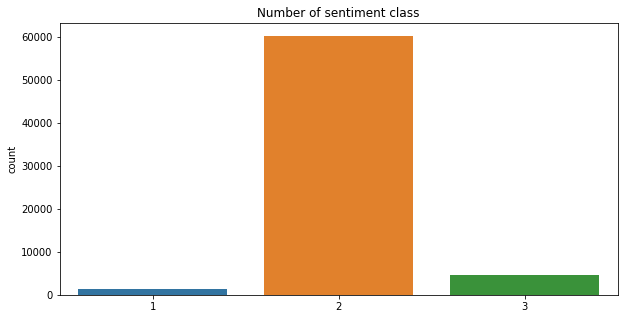

In [41]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Number of sentiment class')
sns.countplot(result)

## Method 2: OOP to built class perform all models

Perform the TOP 3 models (based on accuracy on train data) in functions. 

In [3]:
## Import every packages
from scipy import stats
import string
from nltk.corpus import stopwords
stopwords_e=stopwords.words('english')
from nltk.stem import SnowballStemmer
snow=SnowballStemmer('english')
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
vector=TfidfVectorizer(stop_words='english')

In [3]:
## Preprocess function
def data_preprocess(text):
    text_nonpunc=[w.lower() for w in text if w not in string.punctuation]
    text_nonpunc=''.join(text_nonpunc)
    text_rmstop=[x for x in text_nonpunc.split(' ') if x not in stopwords_e]
    text_stem=[snow.stem(w) for w in text_rmstop]
    text1=' '.join(text_stem)
    return (text1)

In [14]:
## OOP Class 
## Notice: Class name and the first def should have a blank line
class EstimatorSelection:
    
    def __init__(self, models):
        self.models=models
        self.keys=models.keys()
        self.results={}
        self.modelfit={}
        self.modelpredict={}
    def fit(self, x, y):
        x1=x.apply(lambda i: data_preprocess(i))
        x_feature1=vector.fit_transform(x1)
        for key in self.keys:
            model=self.models[key]
            self.modelfit[key]=model.fit(x_feature1,y)
            y_pred=model.predict(x_feature1)
            self.results[key]=classification_report(y, y_pred,output_dict=True)
    def predict(self,test_x):
        test_x1=test_x.apply(lambda i: data_preprocess(i))
        test_feature1=vector.transform(test_x1)
        test_frames=[]
        for key in self.keys:
            modelfit=self.modelfit[key]
            test_y=modelfit.predict(test_feature1)
            test_frame=pd.DataFrame(test_y,columns=[key])
            test_frames.append(test_frame)
        predict_frame=pd.concat(test_frames,axis=1)            
        return(predict_frame)     
    def summary(self):
        Frames=[]
        for key in self.keys:
            result=self.results[key]
            Frame=pd.DataFrame(result['macro avg'], index=[key])
            Frames.append(Frame)
        result_sum=pd.concat(Frames)
        return result_sum.iloc[:,:3]

In [15]:
## Models want to predict on test data
models = { 
    'LogisticClassifier': LogisticRegression(multi_class='ovr'),
    'RandomforestClassifier':RandomForestClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier()
}

In [16]:
model_compare=EstimatorSelection(models)

In [17]:
model_compare.fit(train.Phrase, train.Sentiment)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
summary=model_compare.summary()
summary

,precision,recall,f1-score
LogisticClassifier,0.640969,0.442925,0.487665
RandomforestClassifier,0.798794,0.768013,0.782492
DecisionTreeClassifier,0.811870,0.785261,0.789835


In [19]:
predict_result=model_compare.predict(test.Phrase)
predict_result

,LogisticClassifier,RandomforestClassifier,DecisionTreeClassifier
0,3,2,3
1,3,2,3
2,2,2,2
3,3,2,3
4,3,2,3
...,...,...,...
66287,1,1,1
66288,1,1,1
66289,2,1,1
66290,2,1,1


## Reshape result dataframe to plot
Method: Melt() and Pivottable()

In [47]:
predict_result1=predict_result.reset_index().rename(columns={'index':'case'})
predict_result2=pd.melt(predict_result1,id_vars='case', value_vars=['LogisticClassifier', 'RandomforestClassifier', 'DecisionTreeClassifier'])

,case,LogisticClassifier,RandomforestClassifier,DecisionTreeClassifier
0,0,3,2,3
1,1,3,2,3
2,2,2,2,2
3,3,3,2,3
4,4,3,2,3
...,...,...,...,...
66287,66287,1,1,1
66288,66288,1,1,1
66289,66289,2,1,1
66290,66290,2,1,1


In [103]:
predict_result2=pd.melt(predict_result1,id_vars='case', value_vars=['LogisticClassifier', 'RandomforestClassifier', 'DecisionTreeClassifier'])
predict_result2

,case,variable,value
0,0,LogisticClassifier,3
1,1,LogisticClassifier,3
2,2,LogisticClassifier,2
3,3,LogisticClassifier,3
4,4,LogisticClassifier,3
...,...,...,...
198871,66287,DecisionTreeClassifier,1
198872,66288,DecisionTreeClassifier,1
198873,66289,DecisionTreeClassifier,1
198874,66290,DecisionTreeClassifier,1


In [176]:
predict_result3=predict_result2.groupby(['variable','value']).size().reset_index().rename(columns={0:'count'})
predict_result3

,variable,value,count
0,DecisionTreeClassifier,0,1845
1,DecisionTreeClassifier,1,10211
2,DecisionTreeClassifier,2,40256
3,DecisionTreeClassifier,3,12389
4,DecisionTreeClassifier,4,1591
5,LogisticClassifier,0,554
6,LogisticClassifier,1,6262
7,LogisticClassifier,2,47399
8,LogisticClassifier,3,11004
9,LogisticClassifier,4,1073


## Compare ML models predict results

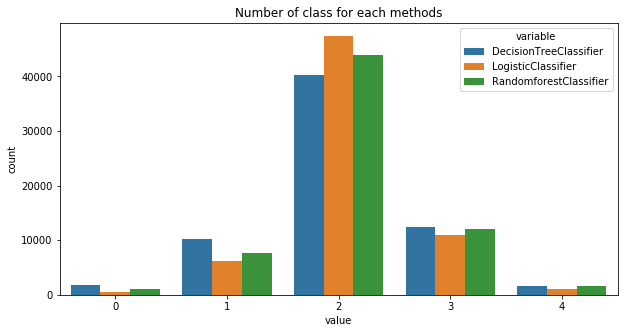

In [180]:
plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_title('Number of class for each methods')
sns.barplot(x='value', y='count', hue='variable', data=predict_result3)

## Get the Final result from the mode of three classification results

In [227]:
Final_results=[]
for i in range(predict_result1.shape[0]):
    Final_result=stats.mode(predict_result1.iloc[i,]).mode.item()
    Final_results.append(Final_result)

In [231]:
predict_result1['Final_result']=Final_results
predict_result1

In [234]:
test['Sentiment']=Final_results
test

,PhraseId,SentenceId,Phrase,Sentiment
0,156061,8545,An intermittently pleasing but mostly routine ...,3
1,156062,8545,An intermittently pleasing but mostly routine ...,3
2,156063,8545,An,2
3,156064,8545,intermittently pleasing but mostly routine effort,3
4,156065,8545,intermittently pleasing but mostly routine,3
...,...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario .",1
66288,222349,11855,"A long-winded , predictable scenario",1
66289,222350,11855,"A long-winded ,",1
66290,222351,11855,A long-winded,1
